In [ ]:
import pandas as pd
from wordcloud import WordCloud
import matplotlib.pyplot as plt

from sklearn.preprocessing import LabelEncoder
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report
from sklearn.model_selection import train_test_split

#vectorization
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer

In [ ]:
df = pd.read_csv("/content/spam.csv")

In [ ]:
df.head()

,Category,Message
0,not spam,"Go until jurong point, crazy.. Available only ..."
1,not spam,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,not spam,U dun say so early hor... U c already then say...
4,not spam,"Nah I don't think he goes to usf, he lives aro..."


In [ ]:
no_spam_sms = ' '.join(df[df["Category"]=="not spam"]["Message"])
spam_sms = ' '.join(df[df["Category"]=="spam"]["Message"])

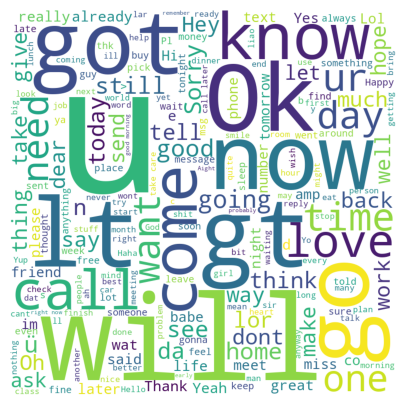

In [ ]:
wc = WordCloud(width = 800, height = 800,
              background_color ='white',
              min_font_size = 10)

wc.generate(no_spam_sms)

plt.figure(figsize=(7,5))
plt.imshow(wc)
plt.axis("off")
plt.show()

In [ ]:
# feature and target
X = df["Message"]
y = df["Category"]

In [ ]:
le = LabelEncoder()
y = le.fit_transform(y)
y

array([0, 0, 1, ..., 0, 0, 0])

In [ ]:
# train test split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.3,random_state=1)

In [ ]:
# CountVectorizer
# tokenization, remove punctuation
cv = CountVectorizer(stop_words="english")
X_train_cv = cv.fit_transform(X_train)
X_test_cv = cv.transform(X_test)

In [ ]:
dt = DecisionTreeClassifier()
dt.fit(X_train_cv,y_train)

DecisionTreeClassifier()

In [ ]:
y_pred = dt.predict(X_test_cv)

print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.98      0.99      0.98      1442
           1       0.90      0.86      0.88       230

    accuracy                           0.97      1672
   macro avg       0.94      0.92      0.93      1672
weighted avg       0.97      0.97      0.97      1672



In [ ]:
# TF-IDF Vectorizer
tfidf = TfidfVectorizer(stop_words="english")
X_train_tfidf = tfidf.fit_transform(X_train)
X_test_tfidf = tfidf.transform(X_test)

In [ ]:
dt2 = DecisionTreeClassifier()
dt2.fit(X_train_tfidf,y_train)

DecisionTreeClassifier()

In [ ]:
y_pred = dt2.predict(X_test_tfidf)

print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.97      0.99      0.98      1442
           1       0.92      0.83      0.87       230

    accuracy                           0.97      1672
   macro avg       0.95      0.91      0.93      1672
weighted avg       0.97      0.97      0.97      1672



In [ ]:
sms1 = "Hey whatsup, let's hang out someday"
sms2 = "FREE iphone on purchase of 20000 rs in myshop.com, claim your reward"

In [ ]:
def predict_sms(sms):
  sms_cv = cv.transform([sms])
  op = dt.predict(sms_cv)
  return le.inverse_transform(op)[0]

In [ ]:
predict_sms(sms1)

'not spam'

In [ ]:
predict_sms(sms2)

'spam'